# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Note**: This notebook was generated with AI assistance. Please verify all code and results independently.

## Overview
This notebook explores Dandiset 001375 ([link](https://dandiarchive.org/dandiset/001375/0.250406.1855)), which contains electrophysiological recordings from mice with DREADD-based disruption of septal GABAergic activity. The data includes recordings from hippocampus and visual cortex while mice run in a virtual hallway.

This notebook demonstrates:
- Loading data from the DANDI archive
- Examining experimental metadata
- Exploring electrophysiological recordings
- Analyzing spike timing data
- Visualizing trial structure

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Loading Data from DANDI

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Get the URL for our example file
url = next(dandiset.get_assets_by_glob("sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb")).download_url

# Open the file for streaming access
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring Dataset Structure and Metadata

In [3]:
# Print basic session information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Session Description: {nwb.session_description}")
print(f"Recording Date: {nwb.session_start_time}")

Subject ID: MS13B
Subject Age: P90D
Subject Sex: M
Session Description: mouse running laps in virtual hallway
Recording Date: 2024-07-25 19:00:00-07:00


## Electrode Configuration

In [4]:
# Get electrode information as a dataframe
electrodes_df = nwb.electrodes.to_dataframe()

# Print summary of electrode groups
for name, group in nwb.electrode_groups.items():
    print(f"\nGroup: {name}")
    print(f"Location: {group.location}")
    print(f"Description: {group.description}")


Group: shank1
Location: ventral hippocampus, visual cortex
Description: shank1, electrodes

Group: shank2
Location: ventral hippocampus, visual cortex
Description: shank2, electrodes


## Visualizing Neural Data

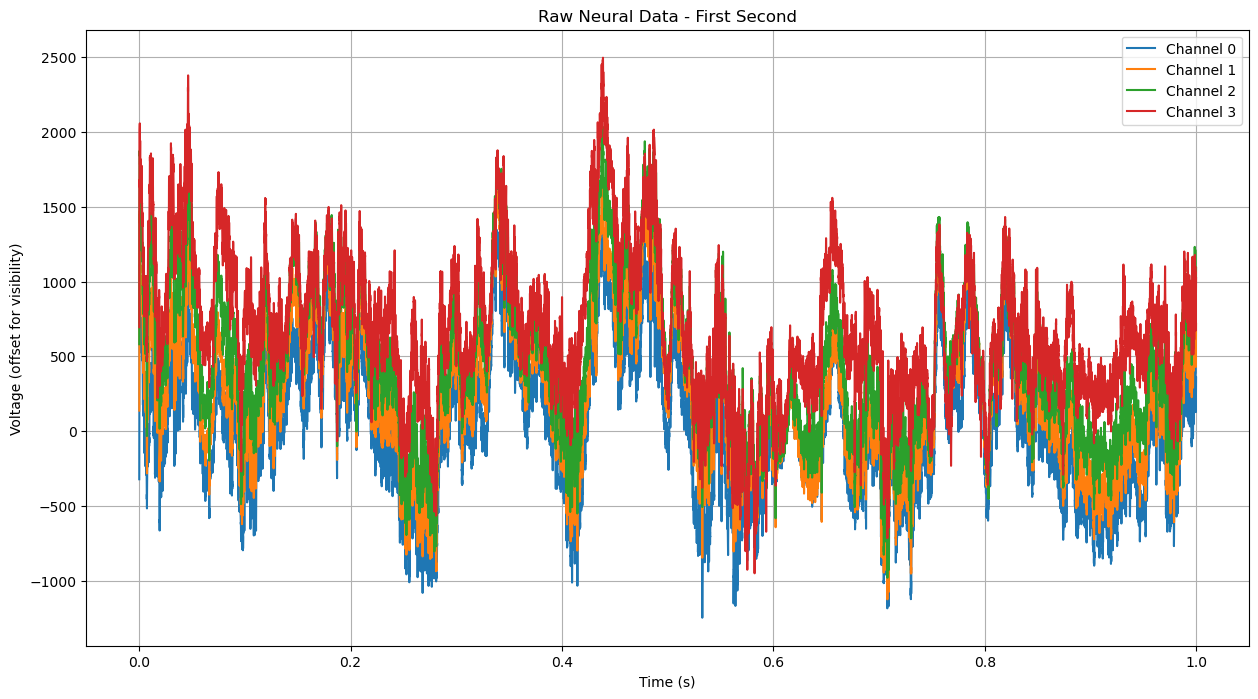

In [5]:
# Plot a short segment of raw data from multiple channels
time_series = nwb.acquisition['time_series']
sample_duration = 1  # 1 second
n_samples = int(sample_duration * time_series.rate)
n_channels_to_plot = 4

plt.figure(figsize=(15, 8))
time = np.arange(n_samples) / time_series.rate
for i in range(n_channels_to_plot):
    plt.plot(time, time_series.data[:n_samples, i] + i*200, label=f'Channel {i}')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (offset for visibility)')
plt.title('Raw Neural Data - First Second')
plt.legend()
plt.grid(True)
plt.show()

## Analysis of Trials

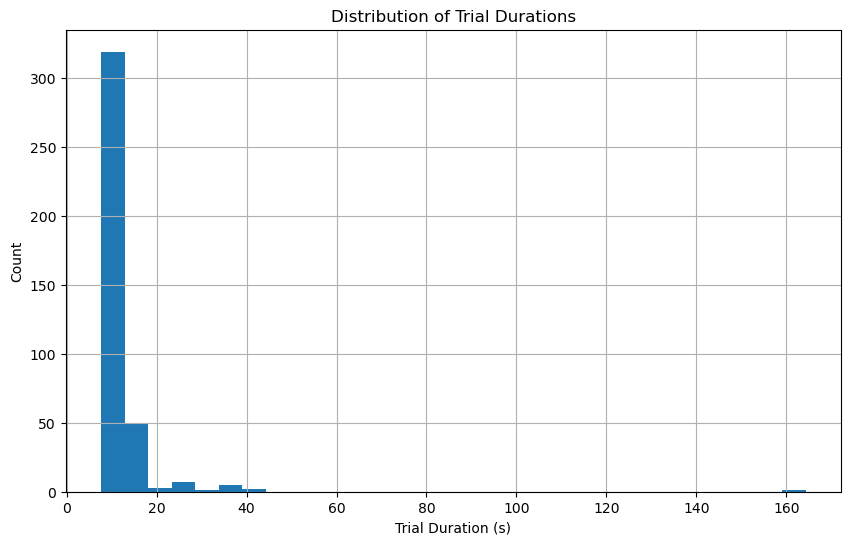

In [6]:
# Get trial information
trials_df = nwb.trials.to_dataframe()

# Calculate trial durations
trial_durations = trials_df['stop_time'] - trials_df['start_time']

# Plot trial duration distribution
plt.figure(figsize=(10, 6))
plt.hist(trial_durations, bins=30)
plt.xlabel('Trial Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.grid(True)
plt.show()

## Spike Analysis

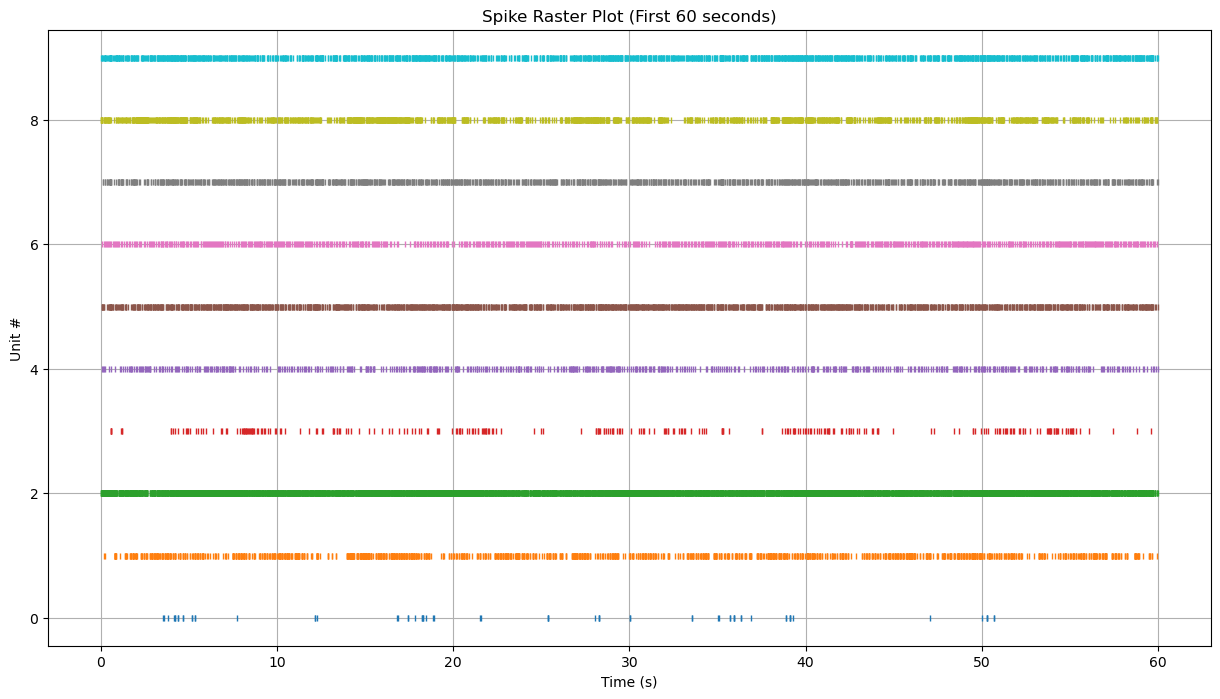

In [7]:
# Plot raster of spike times for first 10 units over first 60 seconds
plt.figure(figsize=(15, 8))

max_units = min(10, len(nwb.units.spike_times_index))
for unit_idx in range(max_units):
    spike_times = nwb.units.spike_times_index[unit_idx]
    mask = spike_times < 60  # First 60 seconds
    plt.plot(spike_times[mask], np.ones_like(spike_times[mask]) * unit_idx, '|', markersize=5)

plt.xlabel('Time (s)')
plt.ylabel('Unit #')
plt.title('Spike Raster Plot (First 60 seconds)')
plt.grid(True)
plt.show()

## Next Steps

This dataset enables various analyses:
- Correlation between neural activity and behavioral trials
- Comparison of activity patterns across brain regions
- Investigation of DREADD effects on neural dynamics
- Analysis of spike timing relationships between units

The code provided here can serve as a foundation for more detailed analyses of the neural recordings and their relationship to behavior.